## 零知识证明前传-Jacobian坐标系变换

我们已经知道定义在一个椭圆曲线上的点加法（实数域），其几何意义如下图：
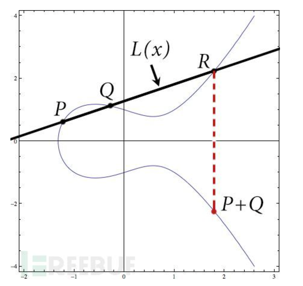
在有限域上的运算计算方式跟实数域类似，只是加减乘除都要对应于模运算，因此计算
$$ y^2 = x^3+ax+b $$
$$ y=mx+c $$
交点要先求出斜率$m=(y_p-y_q)/(x_p-x_q)$。得到R的坐标为：$R(m^2-x_p-x_q,  y_p+m(x_p-x_q))$ ,而真正的加法结果是 $-R(m^2-x_p-x_q,  -y_p-m(x_p-x_q))$。

### 模意义下除法运算开销巨大
很明显，在计算$m=(y_p-y_q)/(x_p-x_q)$的时候，需要模运算，根据扩展欧几里得算法或者费马小定理，${(x_p-x_q)}^{-1}={(x_p-x_q)}^{q-2}$，把除法先变成指数运算，而指数运算一般都是把它拆成$log_2(q-2)$个乘法来实现，在$q$为200位左右的时候，一个除法的开销平均是乘法的80倍左右。所以当$q$很大的时候，需要对除法做一个优化。

### 仿射坐标系(affine coordinate)和射影坐标系(projective coordinate)
在椭圆曲线上点的表示有两种形式：仿射坐标Affine表示和射影坐标Projection表示，通过将椭圆曲线上的点坐标从仿射坐标转换到射影坐标中，就可以巧妙地避开扩展欧几里得算法或者费马小定理。椭圆曲线的方程表示和坐标运算如果基于仿射坐标的，椭圆曲线的仿射方程就是$y^2 ＝ x^3 ＋ ax ＋ b$，在有限域中，这个方程也就表达为$ y^2＝(x^3＋ax＋b)\,mod\,p $。在仿射坐标下才存在要使用扩展欧几里得算法求解乘法逆元的问题。如果基于三维的射影坐标一个点的坐标表示为$( x , y , z )$ 。这里我们规定：在标准射影坐标中，点$( x , y , z )$ 对应仿射坐标中的点$(\frac xz,\frac yz)$，如果$z=1$,在仿射坐标中的点$( x , y )$对应标准射影坐标中的点$( x , y , 1 )$。

有了这样的一个对应关系，就得到了标准射影坐标中的椭圆曲线方程：$y^2z＝x^3＋axz^2＋bz^3$ 
在btc等区块链实际使用的更多的是Jacobian加重射影坐标，与标准射影坐标方法类似，在Jacobian加重射影坐标中，一个射影点的坐标表示为$( x , y , z )$，这里我们规定：在Jacobian加重射影坐标，点$( x , y , z )$对应仿射坐标中的点$ (\frac {x}{z^2},\frac {y}{z^3})$，如果$z=1$，在仿射坐标中的点$( x , y )$对应Jacobian加重射影坐标中的点$( x , y , 1 )$。有了这样的一个对应关系，就得到了Jacobian加重射影坐标中的椭圆曲线方程：$y^2＝x^3＋axz^4＋bz^6$

### 推导Jacobian坐标
在Jacobian坐标系下，计算交点，也是先求出$m$，推导过程详细如下：
$$ m = (\frac {y_q}{z_q^3}- \frac {y_p}{z_p^3})/(\frac {x_q}{z_q^2}-\frac {x_p}{z_p^2}) \\
\therefore z_p \cdot z_q \cdot m = ({y_q} \cdot {z_p^3}- {y_p} \cdot {z_q^3})/({x_q} \cdot {z_p^2}-{x_p} \cdot {z_q^2}) \\
令 a = {x_q} \cdot {z_p^2} \\
b =  ({x_q} \cdot {z_p^2}-{x_p} \cdot {z_q^2}) \\
c = {y_q} \cdot {z_p^3} \\
z_r = z_p \cdot z_q \cdot b \\
d = {y_q} \cdot {z_p^3}- {y_p} \cdot {z_q^3} \\
\therefore m = d / z_r \\
\because \frac {x_r}{z_r^2} = m^2-\frac {x_p}{z_p^2}-\frac {x_q}{z_q^2} \\
\therefore {x_r} = m^2 \cdot{z_r^2} - {z_r^2} \cdot (\frac {x_p}{z_p^2}+\frac {x_q}{z_q^2}) \\
\therefore {x_r} = d^2  - {b^2} \cdot {z_p}^2 \cdot {z_q}^2 \cdot (\frac {x_p}{z_p^2}+\frac {x_q}{z_q^2}) \\
\therefore {x_r} = d^2  - {b^2} \cdot ({x_p}{z_q^2}+ {x_q}{z_p^2}) \\
\therefore {x_r} = d^2  - {b^2} \cdot (b+2a) \\
类似的，可以得到 {y_r} = d (a \cdot b^2  - x_r) - c \cdot b^3 \\
$$

可以参考和对比维基百科的链接给出的伪代码：
https://en.wikibooks.org/wiki/Cryptography/Prime_Curve/Jacobian_Coordinates

### 结论
通过把仿射坐标变换到Jacobian射影坐标，计算点加法运算可以把一次除法变成12次乘法和4次平方运算，速度可以提升1个量级，例如在libsecp256k1中就采用了从仿射坐标到射影坐标再到仿射坐标的过程，这个方法避开了扩展欧几里得算法求乘法逆元，大大提高了算法效率。

